# PERFORMANCE ANALYSIS OF STRAWBERRY FARM

This notebook analyses the efficiency of the agents in the simulated strawberry farm environment based on various key performance indicators.

The KPIs include:
1. Strawberry Collection 
2. Strawberries Dropped-Off 
3. Picker Robots Distance Traveled Efficiency
4. Picker Robots Battery Efficiency

## Note on Seed

The random seed is fixed for reproducibility. This ensures that the results of the simulation are consistent across multiple runs. The seed value is set to 42, which means that the exact locations of strawberries and other elements in the simulation will be the same for each run, leading to consistent results.

**Import Necessary Libraries**

In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from tabulate import tabulate

# Add the path to the src directory
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

from farm.model import StrawberryFarm

**Set Parameters**

In [2]:
num_steps = 1000 # Target number of steps taken in the model

**Define Simulation Function**

In [ ]:
def run_simulation(n_picker, n_explorer, width, height, strawberry_percentage, mode):
    farm = StrawberryFarm(n_picker, n_explorer, width, height, strawberry_percentage, mode)

    # Run the simulation and collect data
    for step in range(num_steps):
        if not farm.running:
            break
        farm.step()

    # Get the collected data
    data = farm.datacollector.get_model_vars_dataframe()

    return data

**Running the Simulation**

In [ ]:
results = []
modes = ["Basic", "Extended", "Novel"]
for mode in modes:
    mode_results = {key: [] for key in ["strawberries_picked", "strawberries_in_basket", "total_distance_traveled_by_picker", "total_distance_traveled_by_explorer", "total_battery_consumed_by_picker", "total_battery_consumed_by_explorer"]}
    print(f"Running simulation for mode: {mode}")
    data = run_simulation(n_picker=20, n_explorer=20, width=30, height=25, strawberry_percentage=100, mode=mode)
    for key in data.columns:
        mode_results[key].append(data[key].tolist())

    # Calculate the average results for the mode
    result = {key: mode_results[key][0] for key in mode_results}
    result["mode"] = mode
    results.append(result)

Running simulation for mode: Basic
Running simulation for mode: Extended
Running simulation for mode: Novel


**Create a DataFrame**

In [5]:
df = pd.DataFrame(results)

## KPI 1: Strawberry Collection 

Measures the number of strawberry collected within the first `num_step` steps. A higher number of strawberries collected means that the mode is more effective in collecting strawberries

**Plotting KPI**

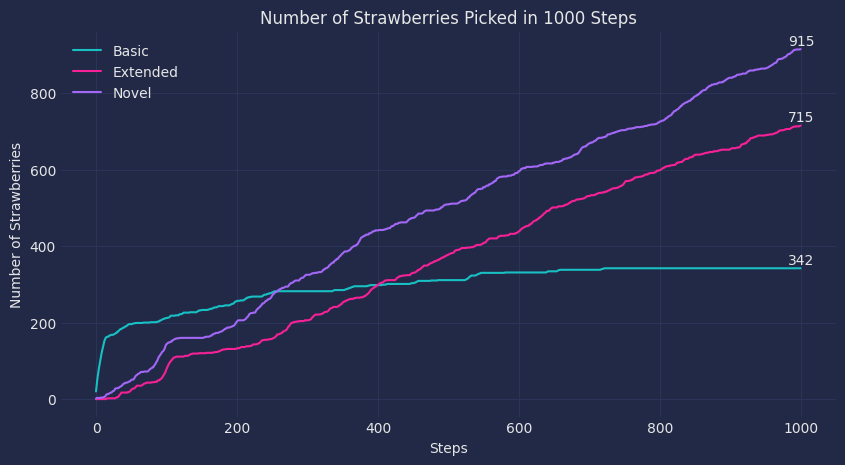

In [6]:
# Load the style
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

# Plot
plt.figure(figsize=(10, 5))
for mode in modes:
    mode_data = df[df["mode"] == mode]
    if len(mode_data["strawberries_picked"].values[0]) == num_steps:
        picked_values = mode_data["strawberries_picked"].values[0]
        plt.plot(range(num_steps), picked_values, label=f"{mode}")
        # Annotate the final value
        plt.annotate(f"{picked_values[-1]}", (num_steps, picked_values[-1]), textcoords="offset points", xytext=(0,3), ha='center')
    else:
        print(f"ERROR: Insufficient data for mode {mode}!")

plt.xlabel("Steps")
plt.ylabel("Number of Strawberries")
plt.title(f"Number of Strawberries Picked in {num_steps} Steps")
plt.legend()
plt.show()

In this analysis, the Novel Mode shows a higher number of strawberries collected compared to other modes. This indicates that more strawberries are collected in the Novel Mode, making it the most effective mode in terms of strawberry collection.

_Note: It is good to note that in the Basic Model, trees have a limited number of strawberries because the strawberries do not grow back, which restricts the total number of strawberries that can be picked. Therefore, it can be seen in the graph that the number of strawberries picked in Basic Mode stays the same over time._

## KPI 2: Strawberries Dropped-Off

Measures the number of strawberry collected and dropped off within the first `num_step` steps. Higher number of strawberry collected and dropped off means that the mode is more effective in delivering strawberries to the collection points.

**Plotting KPI**

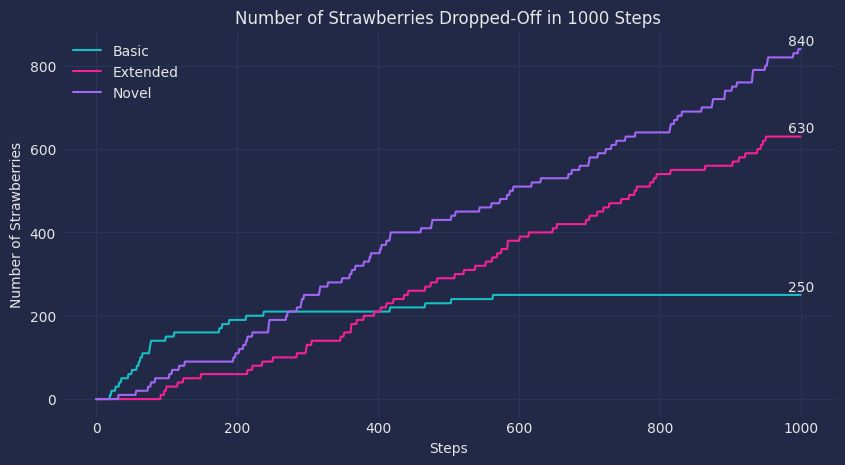

In [7]:
# Load the style
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

# Plot
plt.figure(figsize=(10, 5))
for mode in modes:
    mode_data = df[df["mode"] == mode]
    if len(mode_data["strawberries_in_basket"].values[0]) == num_steps:
        picked_values = mode_data["strawberries_in_basket"].values[0]
        plt.plot(range(num_steps), picked_values, label=f"{mode}")
        # Annotate the final value
        plt.annotate(f"{picked_values[-1]}", (num_steps, picked_values[-1]), textcoords="offset points", xytext=(0,3), ha='center')
    else:
        print(f"ERROR: Insufficient data for mode {mode}!")

plt.xlabel("Steps")
plt.ylabel("Number of Strawberries")
plt.title(f"Number of Strawberries Dropped-Off in {num_steps} Steps")
plt.legend()
plt.show()

In this analysis, the Novel Mode shows a higher number of strawberries dropped off compared to other modes. This indicates that more strawberries are successfully delivered in the Novel Mode, making it the most effective mode in terms of completing the strawberry collection process.

## KPI 3: Picker Robots Distance Traveled Efficiency 

 Measures the efficiency rate as the ratio of strawberries picked to total distance traveled by the picker robots within the first `num_step` steps. Higher efficiency rate indicates the mode is more efficient in terms of distance traveled and more strawberries are collected per unit of distance traveled.

**Calculating the Efficiency Rate**

In [8]:
df_copy = df.copy()
df_copy["overall_distance_traveled_by_picker"] = df["total_distance_traveled_by_picker"].apply(lambda x: x[-1] if x else 0)
df_copy["overall_strawberries_picked"] = df["strawberries_picked"].apply(lambda x: x[-1] if x else 0)
df_copy["efficiency_rate"] = df_copy.apply(lambda row: row["overall_strawberries_picked"] / row["overall_distance_traveled_by_picker"] * 100 if row["overall_distance_traveled_by_picker"] > 0 else 0, axis=1)

**Plotting KPI**

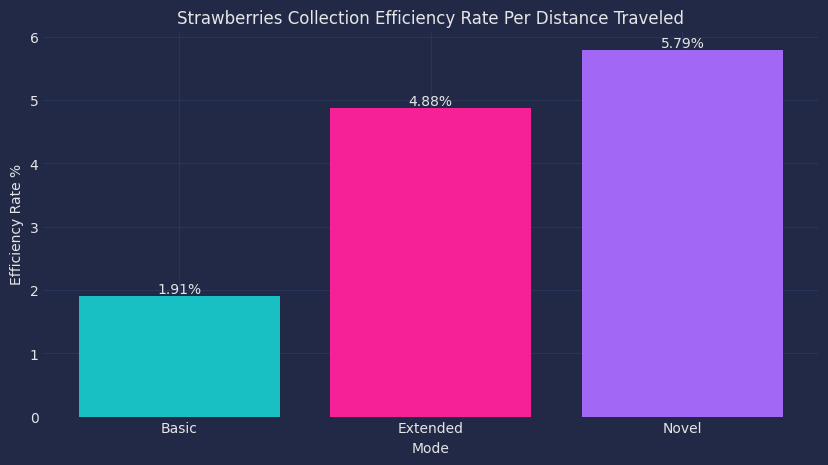

In [9]:
# Load the style
style_url = 'https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle'
plt.style.use(style_url)
style_colors = mpl.rcParams['axes.prop_cycle'].by_key()['color'] # Extract the colors from the style

# Plot
plt.figure(figsize=(10, 5))
bars = plt.bar(df_copy["mode"], df_copy["efficiency_rate"], color=style_colors[:len(df_copy["mode"])])

# Add numbers on top of the bars
for bar in bars:
    yval = bar.get_height()
    yval_text = f"{int(yval)}" if yval.is_integer() else f"{yval:.2f}"
    plt.text(bar.get_x() + bar.get_width()/2, yval, yval_text+"%", ha='center', va='bottom')

plt.xlabel("Mode")
plt.ylabel("Efficiency Rate %")
plt.title("Strawberries Collection Efficiency Rate Per Distance Traveled")
plt.show()

In this analysis, the Novel Mode shows a higher efficiency rate compared to other modes. This indicates that with less distance traveled, more strawberries are collected in the Novel Mode, making it the most efficient mode in terms of distance traveled.

## KPI 4: Picker Robots Battery Efficiency 

Measures the efficiency as the ratio of strawberries picked to the total battery usage within the first `num_step` steps. Higher efficiency rate indicates that the mode is more efficient in terms of battery usage and more strawberries are collected per unit of battery consumed.

**Calculating the Efficiency Rate**

In [10]:
df_copy = df.copy()
df_copy["overall_battery_consumed_by_picker"] = df["total_battery_consumed_by_picker"].apply(lambda x: x[-1] if x else 0)
df_copy["overall_strawberries_picked"] = df["strawberries_picked"].apply(lambda x: x[-1] if x else 0)
df_copy["efficiency_rate"] = df_copy.apply(lambda row: row["overall_strawberries_picked"] / row["overall_battery_consumed_by_picker"] * 100 if row["overall_battery_consumed_by_picker"] > 0 else 0, axis=1)

**Plotting KPI**

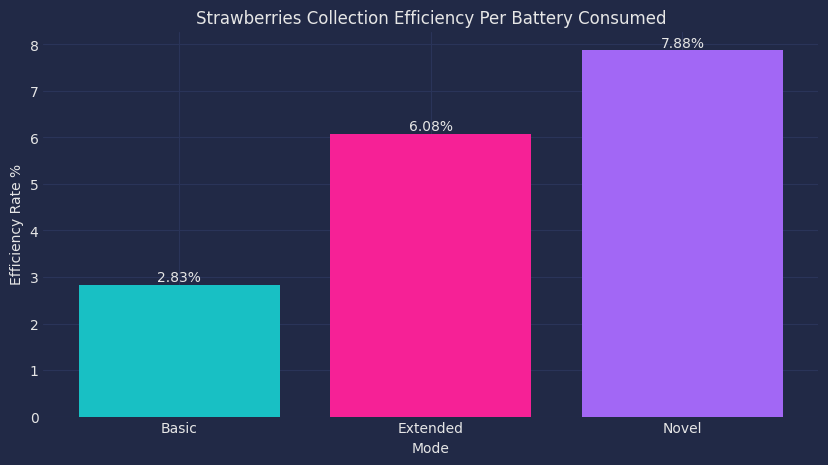

In [11]:
# Load the style
style_url = 'https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle'
plt.style.use(style_url)
style_colors = mpl.rcParams['axes.prop_cycle'].by_key()['color'] # Extract the colors from the style

# Plot
plt.figure(figsize=(10, 5))
bars = plt.bar(df_copy["mode"], df_copy["efficiency_rate"], color=style_colors[:len(df_copy["mode"])])

# Add numbers on top of the bars
for bar in bars:
    yval = bar.get_height()
    yval_text = f"{int(yval)}" if yval.is_integer() else f"{yval:.2f}"
    plt.text(bar.get_x() + bar.get_width()/2, yval, yval_text+"%", ha='center', va='bottom')

plt.xlabel("Mode")
plt.ylabel("Efficiency Rate %")
plt.title("Strawberries Collection Efficiency Per Battery Consumed")
plt.show()

In this analysis, the Novel Mode shows a higher efficiency rate compared to other modes. This means that with less battery consumed, more strawberries are collected in the Novel Mode, making it the most efficient mode in terms of battery consumption.